In [2]:
import tensorflow as tf
import os

In [18]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [19]:
import cv2
import imghdr

In [22]:
data_dir = 'data'

In [23]:
image_exts = ['jpeg','jpg','bmp','png']

In [24]:
for image_class in os.listdir(data_dir): #Itero le cartelle nel path ../data
    for image in os.listdir(os.path.join(data_dir, image_class)):#Itero le immagini nelle cartelle ../data/infected
        image_path = os.path.join(data_dir, image_class, image)#Associo alla var image_path il percorso /data/infected/img.png
        try:
            img = cv2.imread(image_path) #Provo a leggere l'ext della pic
            tip = imghdr.what(image_path)#e capire se è nelle exts che ho inizializzato sopra in image_exts
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path) #se l'ext non è presente, cancello il path della pic
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            #os.remove(image_path)

In [25]:
import numpy as np
from matplotlib import pyplot as plt

In [36]:
data = tf.keras.utils.image_dataset_from_directory('data') #creo un dataset a partire dal path ../data/../...png
data

Found 27558 files belonging to 2 classes.


<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [49]:
data_iterator = data.as_numpy_iterator() #creo un iterator

In [50]:
#Get another batch from the iterator
batch = data_iterator.next()

In [53]:
#Class 1 Uninfected
#Class 0 Parasitized
batch[0][1]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

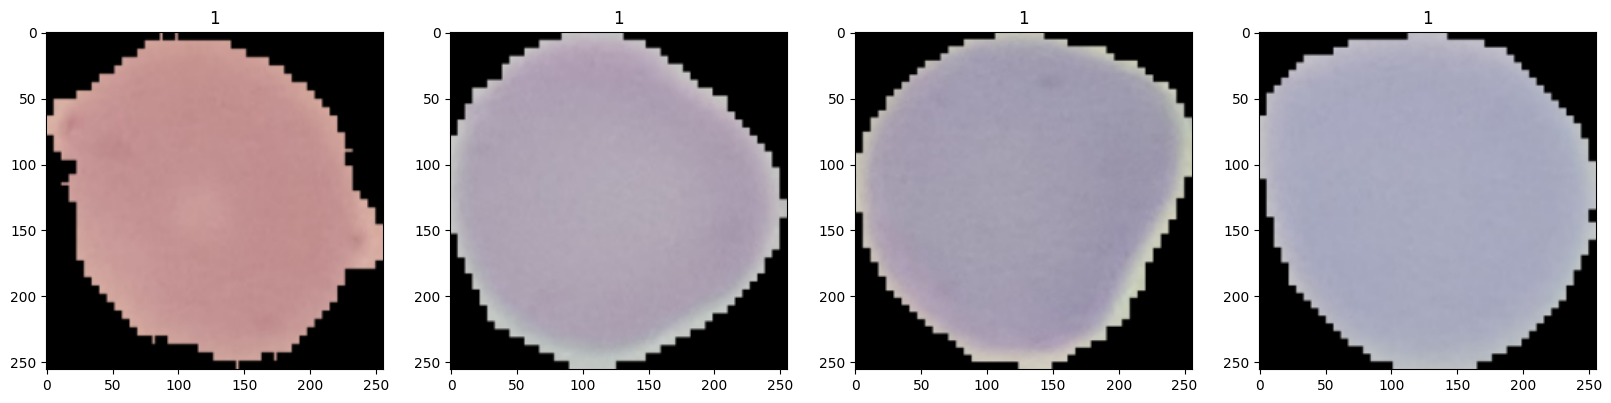

In [52]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20)) 
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [54]:
data = data.map(lambda x,y: (x/255, y))
data


<MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [55]:
data.as_numpy_iterator().next

<bound method _NumpyIterator.next of <tensorflow.python.data.ops.dataset_ops._NumpyIterator object at 0x00000283712A2290>>

In [57]:
train_size = int(len(data)*.7) #variabile di size per il trainset 70%
val_size = int(len(data)*.2) #variabile di size per il valueset 20%
test_size = int(len(data)*.1) #variabile di size per il testset 10%

In [58]:
train = data.take(train_size) #variabile train presa in base alla size scelta
val = data.skip(train_size).take(val_size) #variabile value presa in base a uno skip dei valori presi dal train e la size del val
test = data.skip(train_size+val_size).take(test_size)#variabile value presa in base a uno skip dei valori presi dal train+val e la size del test

In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout


In [37]:
model = Sequential()

In [43]:
model.add(Conv2D(16, (3,3), 1, activation='relu' ,input_shape=(256, 256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [44]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 252, 252, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 16)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 60, 60, 16)        4

In [46]:
logdir='logs'

In [47]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
603/603 [==============================] - 745s 1s/step - loss: 0.6932 - accuracy: 0.5005 - val_loss: 0.6932 - val_accuracy: 0.4924
Epoch 2/20
603/603 [==============================] - 779s 1s/step - loss: 0.6932 - accuracy: 0.4976 - val_loss: 0.6932 - val_accuracy: 0.4976
Epoch 3/20
603/603 [==============================] - 795s 1s/step - loss: 0.6932 - accuracy: 0.4982 - val_loss: 0.6932 - val_accuracy: 0.4935
Epoch 4/20
603/603 [==============================] - 804s 1s/step - loss: 0.6932 - accuracy: 0.5002 - val_loss: 0.6933 - val_accuracy: 0.4915
Epoch 5/20
603/603 [==============================] - 795s 1s/step - loss: 0.6932 - accuracy: 0.4990 - val_loss: 0.6932 - val_accuracy: 0.4933
Epoch 6/20
603/603 [==============================] - 791s 1s/step - loss: 0.6932 - accuracy: 0.4996 - val_loss: 0.6932 - val_accuracy: 0.4945
Epoch 7/20
252/603 [===========>..................] - ETA: 6:45 - loss: 0.6932 - accuracy: 0.4945

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [ ]:
print(f'Precision:{pre.result().numpy()}, Recall:{ re.result().numpy()}, Accuracy: {acc.result().numpy()}')

In [ ]:
import cv2

In [ ]:
img = cv2.imread('parasitizedtest.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

In [ ]:
if yhat > 0.5:
    print(f'Predicted class is Uninfected')
else:
    print(f'Predicted class is Parasitized')

In [1]:
from tensorflow import keras


In [ ]:
model.save(os.path.join('models','infectedmodel.h5'))


In [ ]:
new_model = keras.load_model(os.path.join('models','infectedmodel.h5'))

In [ ]:
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))

In [ ]:
if yhat > 0.5:
    print(f'Predicted class is Uninfected')
else:
    print(f'Predicted class is Parasitized')